In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,6)

In [2]:
df = pd.read_csv('Dataset/train.csv',index_col=0)

In [3]:
df

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0


In [4]:
df.isna().sum()/df.shape[0]*100

title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [7]:
def create_dist(col):
    return sns.countplot(x=df[col],hue=df[col])

<Axes: xlabel='label', ylabel='count'>

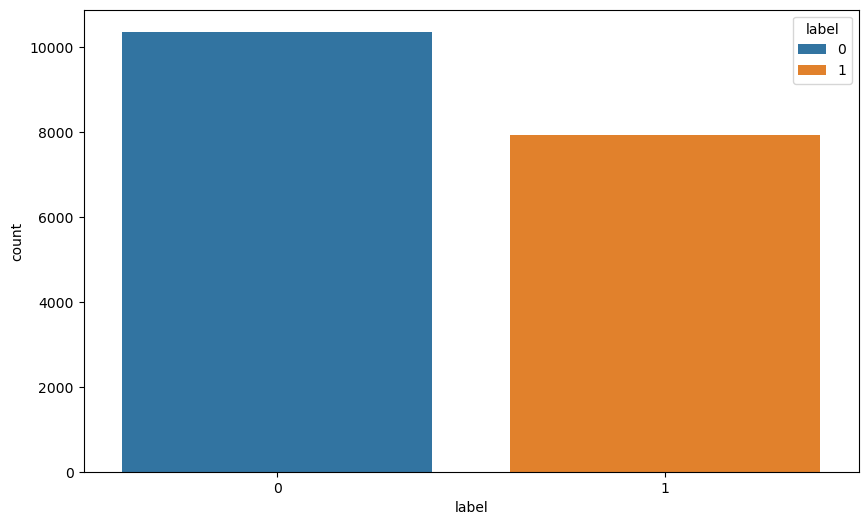

In [8]:
create_dist('label')

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Pre-process Title Feature

In [11]:
messages = df.copy()

In [12]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
data = messages.title[0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [14]:
import re

In [15]:
re.sub('[^a-zA-Z]',' ', data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [16]:
data = data.lower().split()
data

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [17]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [18]:
ps = PorterStemmer()

In [19]:
# List Comprehension
review = [ps.stem(word) for word in data if word not in set(stopwords.words('english'))]

In [20]:
data = " ".join(review)

In [21]:
corpus = []
sentences=[]
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages.title[i])
    list = review.lower().split()
    review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences = " ".join(review)
    corpus.append(sentences)

In [22]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [23]:
len(corpus)

18285

#### Apply Bag of Words on data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [26]:
x = cv.fit_transform(corpus).toarray()

In [27]:
x.shape

(18285, 5000)

In [28]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [30]:
y=messages.label

In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=42)

In [33]:
x_test.shape

(4572, 5000)

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [35]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [36]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [37]:
from sklearn import metrics

In [38]:
metrics.accuracy_score(y_test,y_pred)

0.8904199475065617

In [39]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[2301,  299],
       [ 202, 1770]])

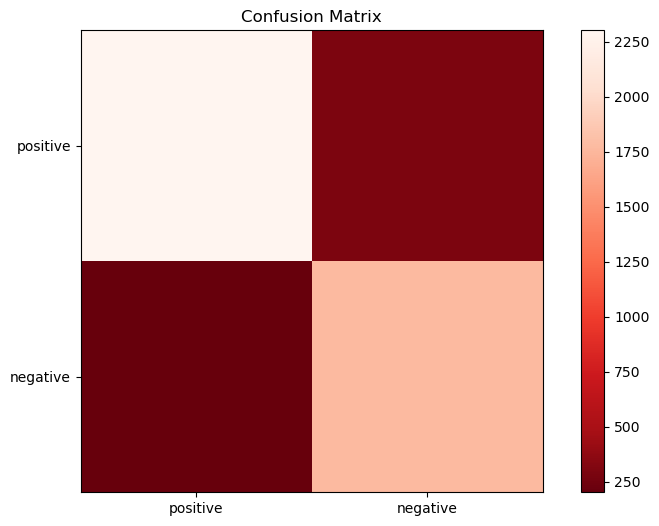

In [40]:
plt.imshow(cm,interpolation='nearest',cmap = plt.cm.Reds_r)
plt.colorbar()
plt.title('Confusion Matrix')
labels = ['positive','negative']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)
plt.show()

In [41]:
def plot_conf(cm):
    plt.imshow(cm,interpolation='nearest',cmap = plt.cm.Reds_r)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels = ['positive','negative']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)
    plt.show()

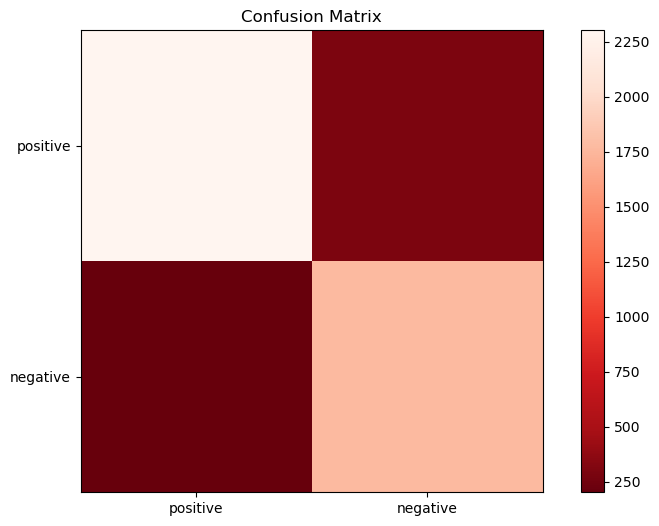

In [42]:
plot_conf(cm)

#### Apply Passive Aggressive Classifier on Data

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [44]:
linear_clf = PassiveAggressiveClassifier()

In [45]:
linear_clf.fit(x_train, y_train)

PassiveAggressiveClassifier()

In [46]:
pred = linear_clf.predict(x_test)

In [47]:
metrics.accuracy_score(pred,y_test)

0.9111986001749781

In [48]:
cm2 = metrics.confusion_matrix(pred,y_test)
cm2

array([[2363,  169],
       [ 237, 1803]])

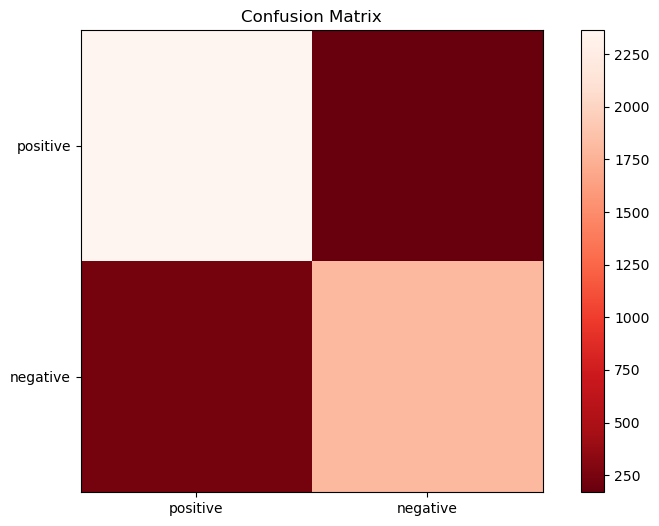

In [49]:
plot_conf(cm2)

#### Which are the most fake words in the real world?

In [50]:
cv.get_feature_names_out()

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [51]:
linear_clf.coef_

array([[-1.41294231, -0.3330793 , -0.6329693 , ..., -0.61797041,
         0.56928968,  0.21222976]])

In [52]:
sorted(zip(linear_clf.coef_[0],cv.get_feature_names_out()),reverse=True)[:20]

[(4.000142291107027, 'idiot'),
 (3.742588747127161, 'comment'),
 (3.639106494519207, 'power'),
 (2.8718493858872978, 'negoti'),
 (2.8493913172550873, 'hillari'),
 (2.8394370004980773, 'wikileak'),
 (2.7470936252039544, 'muslim immigr'),
 (2.7293182823919553, 'invad'),
 (2.6729078788119436, 'ambush'),
 (2.6384905012063826, 'soon'),
 (2.5722538624522153, 'moder'),
 (2.559427515962737, 'world war'),
 (2.5142632182621387, 'shirt'),
 (2.5121975559151957, 'american peopl'),
 (2.488489210022674, 'humili'),
 (2.480278191723783, 'ukrainian'),
 (2.4593921070547173, 'dismiss'),
 (2.444046390931666, 'outsid'),
 (2.39838623567539, 'report new york'),
 (2.3946309117989992, 'complain')]